<a href="https://colab.research.google.com/github/JI411/Decoder_hack_EVRAZ/blob/develop_colab/scr/evraz_08_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-марки-стали-в-наборе-данных" data-toc-modified-id="Самые-популярные-марки-стали-в-наборе-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Самые популярные марки стали в наборе данных</a></span></li><li><span><a href="#Пропуски-нолевые-значения" data-toc-modified-id="Пропуски-нолевые-значения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Пропуски нолевые значения</a></span></li><li><span><a href="#Дисперсия" data-toc-modified-id="Дисперсия-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Дисперсия</a></span></li><li><span><a href="#Выбор-необходимых-данных-для-предсказания" data-toc-modified-id="Выбор-необходимых-данных-для-предсказания-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Выбор необходимых данных для предсказания</a></span></li><li><span><a href="#Выбросы-в-данных" data-toc-modified-id="Выбросы-в-данных-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Выбросы в данных</a></span></li></ul></li><li><span><a href="#Predict" data-toc-modified-id="Predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Predict</a></span></li><li><span><a href="#Проверка-предсказания-на-случайных-данных" data-toc-modified-id="Проверка-предсказания-на-случайных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка предсказания на случайных данных</a></span></li></ul></div>

In [1]:
!pip install pandas_profiling==2.7.1 
!pip install catboost
!git clone https://github.com/JI411/Decoder_hack_EVRAZ/

     |████████████████████████████████| 256kB 4.5MB/s 
     |████████████████████████████████| 3.2MB 14.7MB/s 
     |████████████████████████████████| 81kB 7.5MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 1.1MB 43.7MB/s 
     |████████████████████████████████| 296kB 42.2MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27085 sha256=54a3f805eb0bd576a16bfed90e09f9a2ac89ef0b1d56859c18e13a858ea0cd6f
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107413 sha256=a36d02566460a16605ddac35399dc529f01620f397ef4e72e1a8b1243201ce0b
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
Successfully built htmlmin phik
ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.4.1 which is incompatible.
  Found existing in

In [2]:
import pandas as pd
import numpy as np
import random
import re

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import pandas_profiling

from sklearn.model_selection import train_test_split

pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Полезные ссылки

[Detailed exploratory data analysis with python](https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python)

[Tuatini GODARD](https://www.kaggle.com/ekami66)

[Пример для деревьев решений](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)



## Загрузка данных

In [3]:
df_in = pd.read_csv('/content/Decoder_hack_EVRAZ/data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = df_in
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,"29,0","45,3666667","24,4","41,0333333",NaN,"0,45646","0,059572","0,117446","0,104762","0,0409383","1557,0","1580,0","13,6067425",NaN,"12809,0163934","115,5","1,0","1,0","1,0","18,611",NaN,NaN,NaN,NaN,"0,17",NaN,"0,401","0,123","0,02",NaN,NaN,NaN,"0,051939","0,112",NaN,"0,182",NaN,"0,106","5209,0","0,002","0,389","0,368","0,127","0,682","0,01","0,011","0,086","0,009","0,023","0,459","0,002","0,002","0,003","0,756","0,0001","0,417","0,126","0,779","0,009","0,012","0,086","0,011","0,018","0,559","0,003","0,037",NaN,"63,7","1,1","3,7","0,12","2,6",NaN,NaN,"53,4","1,0","5,8","0,15","2,6",NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,"26,0","44,0666667","13,8666667","44,0666667",NaN,"0,359285","0,083738","0,160923","0,110327","0,0400831","1601,0","1591,0","8,074721",NaN,"12816,3461538","111,6","1,0","1,0","1,0","11,659",NaN,NaN,NaN,NaN,"0,488",NaN,NaN,"0,094","0,02",NaN,NaN,NaN,"0,050854","0,102",NaN,"0,251",NaN,"0,149","2962,0","0,002","0,465","0,345","0,112","0,643","0,009","0,011","0,08","0,007","0,023","0,461","0,002","0,002","0,003","0,774","0,0003","0,416","0,109","0,767","0,008","0,013","0,079","0,008","0,021","0,543","0,003","0,038",NaN,"58,5","0,8","4,9","0,14","2,2",NaN,NaN,"59,3","0,6","4,1","0,11","2,3",NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,"24,0","43,35","17,95","43,35",NaN,"0,331665","0,08149","0,132332","0,13986","0,0416225","1593,0","1586,0","13,801968",NaN,"12511,4206128","115,8","1,0","1,0","1,0","19,871",NaN,NaN,NaN,NaN,"0,05",NaN,"0,346","0,061","0,02",NaN,NaN,NaN,"0,052807","0,16",NaN,"0,204",NaN,"0,145","3743,0","0,002","0,513","0,351","0,107","0,674","0,007","0,011","0,078","0,008","0,019","0,455","0,002","0,002","0,004","0,77","0,0009","0,417","0,108","0,788","0,006","0,012","0,078","0,008","0,013","0,568","0,003","0,038",NaN,"58,0","0,8","8,6","0,12","2,6",NaN,NaN,"57,2","0,5","8,1","0,13","2,3",NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,"17,0","46,1833333","19,8166667","46,1833333",NaN,"0,377945","0,133194","0,221605","0,165186","0,0420497","1589,0","1589,0","12,6649585",NaN,"12998,1497056","116,3","1,0","1,0","1,0","19,497",NaN,NaN,"0,077",NaN,"0,05",NaN,"0,39","0,059","0,02",NaN,NaN,NaN,"0,053349","0,161",NaN,"0,345",NaN,"0,237","4293,0","0,002","0,487","0,31","0,105","0,611","0,009","0,011","0,07","0,006","0,02","0,434","0,001","0,001","0,003","0,767","0,0002","0,419","0,103","0,795","0,008","0,013","0,07","0,007","0,014","0,571",

In [4]:
# profile = pandas_profiling.ProfileReport(df_in, title='Pandas Profiling Report')
# # profile.to_notebook_iframe()
# profile.to_file("/content/profile.html")

# Задача

EDA
выводы по качеству данных:
1. Пропуски
2. Нули
3. Дисперсия
4. Выбросы

Создать модель предсказания для столбцов:

* химшлак последний Al2O3
* химшлак последний CaO
* химшлак последний R
* химшлак последний SiO2

In [5]:
def cat_to_num(data):
  df['nplv'] = df['nplv'].apply(lambda x: ''.join([c for c in x.replace('?', '0') if c.isdigit()])).astype('int64')
  columns_float = df_in.drop(['DT', 'МАРКА', 'ПРОФИЛЬ'], axis=1).columns.values
  df[columns_float] =  df[columns_float].replace(',', '.', regex=True).astype('float64')
  return df

df_in = cat_to_num(df_in)
df_in.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,произв количество обработок,произв количество плавок,произв количество плавок (цел),расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кварцит,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь (сух.),сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл CaC2,ферспл FeMo,ферспл FeSi-75,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый Al_1,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый Ti_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний Ti,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,683703870.0,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,NaN,12809.016393,115.5,1.0,1.0,1.0,18.611,NaN,NaN,NaN,NaN,0.170,NaN,0.401,0.123,0.02,NaN,NaN,NaN,0.051939,0.112,NaN,0.182,NaN,0.106,5209.0,0.002,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.003,0.037,NaN,63.7,1.1,3.7,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,683863886.0,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,NaN,12816.346154,111.6,1.0,1.0,1.0,11.659,NaN,NaN,NaN,NaN,0.488,NaN,NaN,0.094,0.02,NaN,NaN,NaN,0.050854,0.102,NaN,0.251,NaN,0.149,2962.0,0.002,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.003,0.038,NaN,58.5,0.8,4.9,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,683863887.0,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,NaN,12511.420613,115.8,1.0,1.0,1.0,19.871,NaN,NaN,NaN,NaN,0.050,NaN,0.346,0.061,0.02,NaN,NaN,NaN,0.052807,0.160,NaN,0.204,NaN,0.145,3743.0,0.002,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.003,0.038,NaN,58.0,0.8,8.6,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,683863888.0,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,NaN,12998.149706,116.3,1.0,1.0,1.0,19.497,NaN,NaN,0.077,NaN,0.050,NaN,0.390,0.059,0.02,NaN,NaN,NaN,0.053349,0.161,NaN,0.345,NaN,0.237,4293.0,0.002,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.003,0.038,NaN,59.8,0.4,6.4,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,683863889.0,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,NaN,12987.475538,115.0,1.0,1.0,1.0,16.649,NaN,NaN,0.082,NaN,0.050,NaN,0.412,0.035,0.02,NaN,NaN,NaN,0.051975,0.149,NaN,0.263,NaN,0.187,3687.0,0.002,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.001,0.002,0.003,0.784,0.0003,0.421,0.105,

## EDA

### Самые популярные марки стали в наборе данных


In [6]:
mat_counts = df_in.МАРКА.value_counts()
print(f"Самая популярная марка стали: {mat_counts.index[0]}")
labels = mat_counts.index
values = mat_counts.values
pull = np.zeros(shape=(values.shape[0]))
pull[values.argmax()] = 0.1
fig = go.Figure(data=[go.Pie(labels=labels, 
                             values=values,
                             pull=pull,
                             title='Популятность марок стали', )])

fig.update_layout(
    autosize=False,
    width=600,
    height=600,
    )

fig.update_traces(hoverinfo='label+percent+value', textinfo='none',
                  marker=dict(line=dict(color='#000000', width=2)))

fig.show()

Самая популярная марка стали: Э76ХФ


In [7]:
# df_in = df_in[df_in['МАРКА'] == 'Э76ХФ']           <--- не надо ли так сделать?

### Пропуски, нулевые значения

In [8]:
df_him = df_in
df_skips = pd.DataFrame({'Counnt' : df_him.count().sort_index()})
df_skips['Counnt_nan'] = df_him.shape[0] - df_skips.Counnt
df_skips['per_nan'] = df_skips['Counnt_nan'] / (df_skips['Counnt_nan'] + df_skips['Counnt'])

fig = px.bar(df_skips, x=df_skips.index, y='per_nan')
fig.show()

In [9]:
df_him = df_in[[column for column in df_in.columns if re.search('последний|первый',
                                                                column.lower())]]
df_skips = pd.DataFrame({'Counnt' : df_him.count().sort_index()})
df_skips['Counnt_nan'] = df_him.shape[0] - df_skips.Counnt
df_skips['per_nan'] = df_skips['Counnt_nan'] / (df_skips['Counnt_nan'] + df_skips['Counnt'])

fig = px.bar(df_skips, x=df_skips.index, y='per_nan')
fig.show()

In [10]:
fig = px.bar(df_skips, x=df_skips.index, y='Counnt_nan')
fig.show()

### Дисперсия

In [11]:
df_in.describe().transpose().sort_values('50%')

,count,mean,std,min,25%,50%,75%,max
химсталь последний Ca,6218.0,3.191348e-04,2.496444e-04,0.000000,2.000000e-04,3.000000e-04,4.000000e-04,7.000000e-03
химсталь первый Al_1,6444.0,1.782123e-03,4.911289e-04,0.001000,2.000000e-03,2.000000e-03,2.000000e-03,6.000000e-03
химсталь первый Ti_1,6444.0,1.661856e-03,5.638200e-04,0.000000,1.000000e-03,2.000000e-03,2.000000e-03,7.000000e-03
химсталь последний Ti,6444.0,2.902235e-03,5.370645e-04,0.001000,3.000000e-03,3.000000e-03,3.000000e-03,5.000000e-03
химсталь первый V_1,6444.0,2.770019e-03,2.796118e-03,0.000000,2.000000e-03,3.000000e-03,3.000000e-03,8.300000e-02
химсталь последний Al,6444.0,3.181719e-03,1.303787e-03,0.001000,3.000000e-03,3.000000e-03,3.000000e-03,4.800000e-02
химсталь последний Mo,6444.0,6.254500e-03,2.312489e-03,0.001000,5.000000e-03,6.000000e-03,7.000000e-03,6.100000e-02
химсталь первый Mo_1,6443.0,7.048735e-03,2.109568e-03,0.002000,6.000000e-03,7.000000e-03,8.000000e-03,6.400000e-02
химсталь первый P_1,6444.0,9.107697e-03,2.040459e-03,0.004000,8.000000e-03,9.000000e-03,1.000000e-02,2.100000e-02
химсталь последний P,6444.0,1.005788e-02,2.068867e-03,0.004000,9.000000e-03,1.000000e-02,1.100000e-02,2.200000e-02


In [12]:
# Разделяем X и y
y_columns = ['химшлак последний Al2O3', 
             'химшлак последний CaO',
             'химшлак последний R',
             'химшлак последний SiO2']

X_columns = [col for col in df.columns if col not in y_columns]
print(X_columns)

['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка', 't под током', 't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'температура первая', 'температура последняя', 'Ar (интенс.)', 'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь', 'произв количество обработок', 'произв  количество плавок', 'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2', 'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит', 'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)', 'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18', 'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия', 'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1', 'химсталь первый Cu_1', 'химсталь первый Mn_1', 'химсталь первый Mo_1', 'химсталь первый N_1', 'химсталь первый Ni_1', 'х

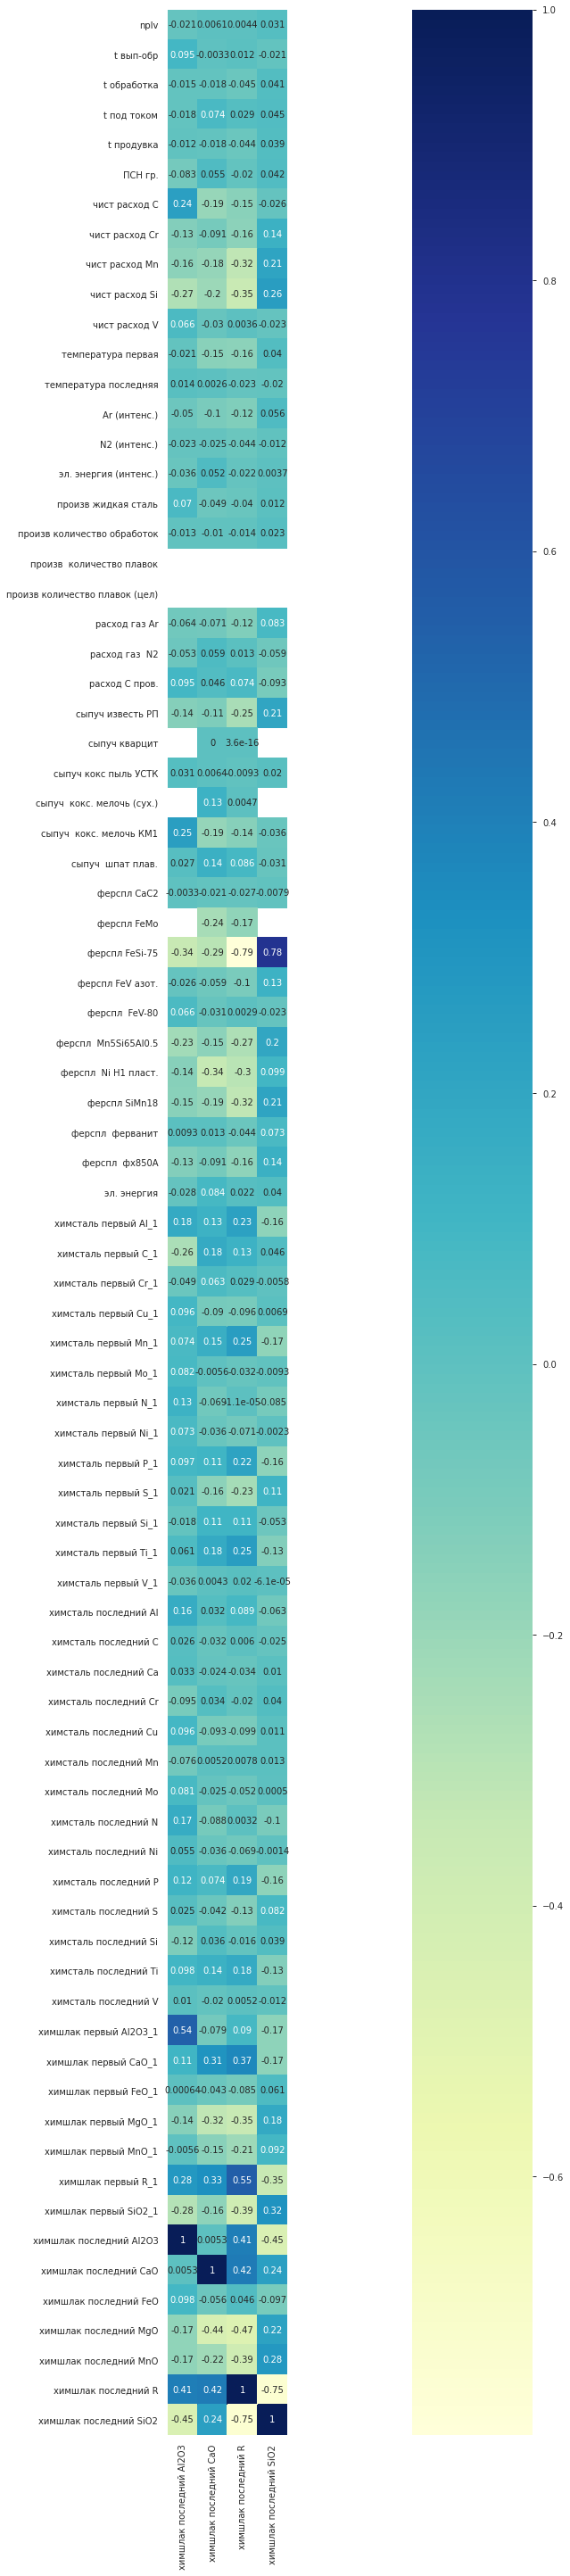

In [13]:
#Простое изучение степени линейной зависимости целевых данных отностельно остальных
corrmat = df_in.corr()
f, ax = plt.subplots(figsize=(50, 50))
sns.heatmap(corrmat[y_columns], 
                        annot=True,
                        square=True,
                        cmap= 'YlGnBu')

In [14]:
high_corr = []
for col in corrmat.columns.values:
  for target in y_columns:
    if corrmat.loc[(target, col)] > 0.4 and col not in ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']:
      high_corr.append([target, col])
high_corr.sort()
high_corr

[['химшлак последний Al2O3', 'химшлак первый Al2O3_1'],
 ['химшлак последний R', 'химшлак первый R_1'],
 ['химшлак последний SiO2', 'ферспл FeSi-75']]

Из этого представления видно: что наиболее полезные для предсказания данные:

    ("чист расход", "ферспл") ??? химшлак первый

### Выбросы в данных


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Обзор выбросов в колонок:
['nplv', 'DT', 'МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка', 't под током', 't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Cr', 'чист расход Mn', 'чист расход Si', 'чист расход V', 'температура первая', 'температура последняя', 'Ar (интенс.)', 'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь', 'произв количество обработок', 'произв  количество плавок', 'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2', 'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит', 'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)', 'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2', 'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80', 'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18', 'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия', 'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый 

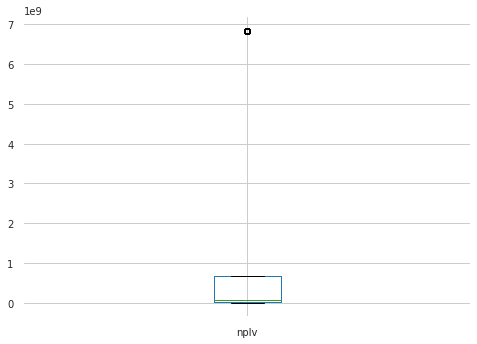

Данные по колонке: t вып-обр
Заполненны на 91.52%


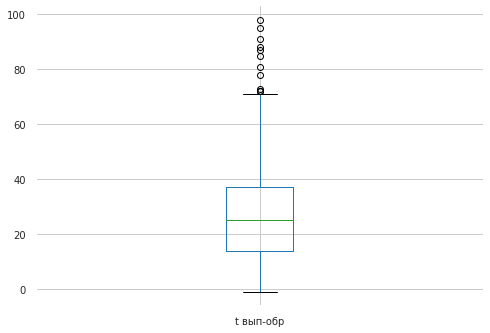

Данные по колонке: t обработка
Заполненны на 91.46%


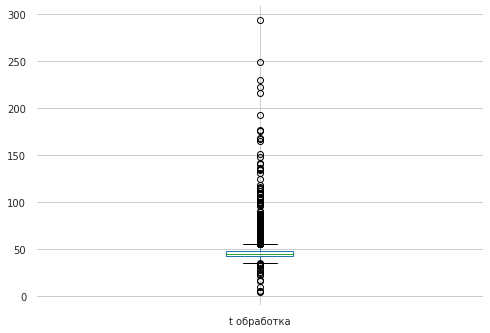

Данные по колонке: t под током
Заполненны на 91.46%


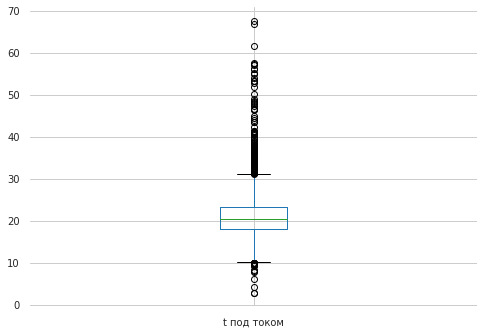

Данные по колонке: t продувка
Заполненны на 91.52%


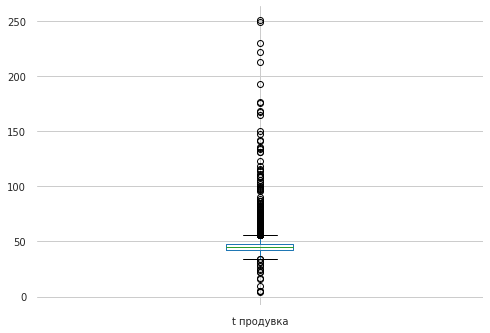

Данные по колонке: ПСН гр.
Заполненны на 74.55%


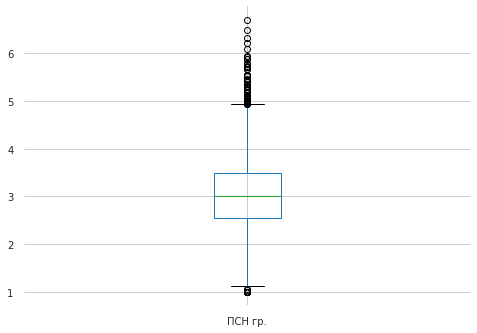

Данные по колонке: чист расход C
Заполненны на 91.39%


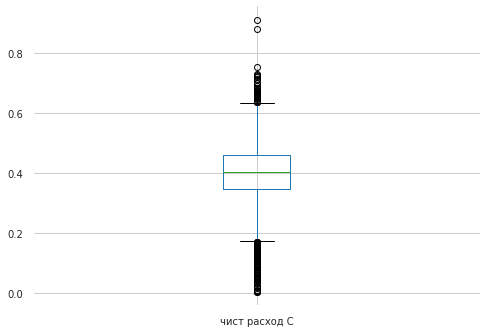

Данные по колонке: чист расход Cr
Заполненны на 83.55%


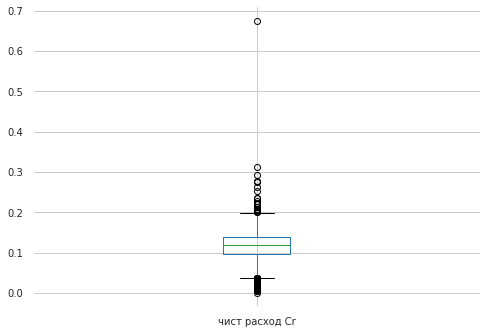

Данные по колонке: чист расход Mn
Заполненны на 91.34%


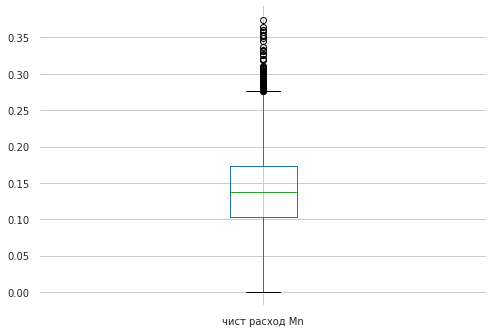

Данные по колонке: чист расход Si
Заполненны на 91.34%


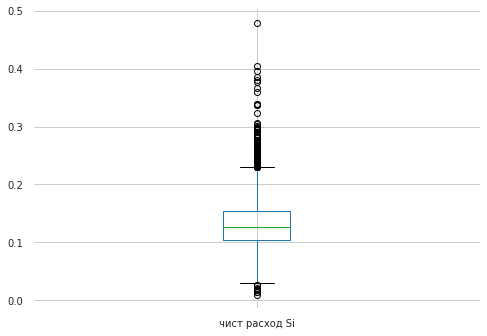

Данные по колонке: чист расход V
Заполненны на 87.74%


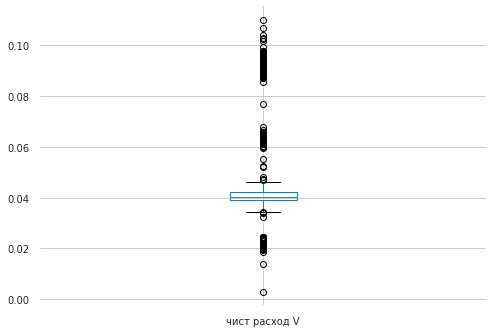

Данные по колонке: температура первая
Заполненны на 91.41%


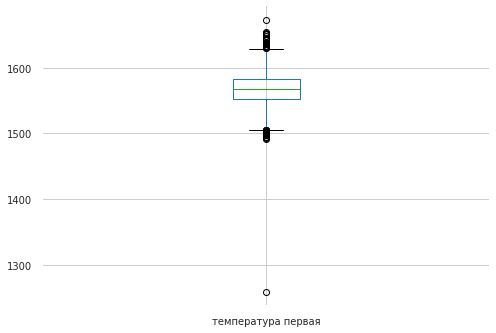

Данные по колонке: температура последняя
Заполненны на 91.41%


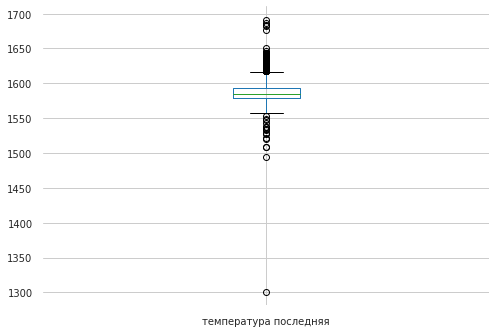

Данные по колонке: Ar (интенс.)
Заполненны на 91.27%


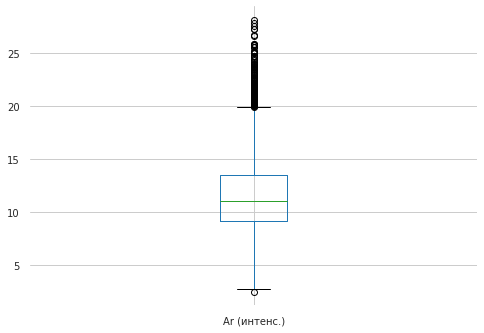

Данные по колонке: N2 (интенс.)
Заполненны на 19.73%


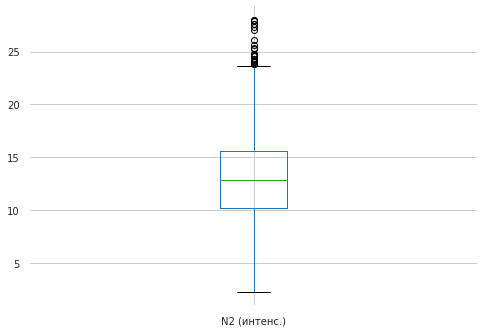

Данные по колонке: эл. энергия (интенс.)
Заполненны на 91.46%


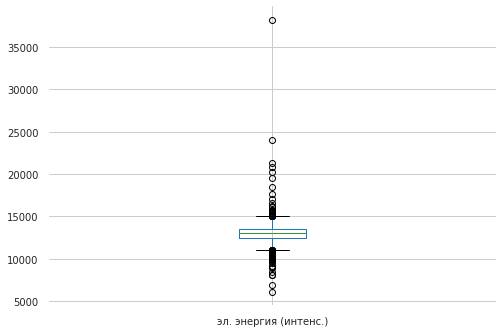

Данные по колонке: произв жидкая сталь
Заполненны на 91.52%


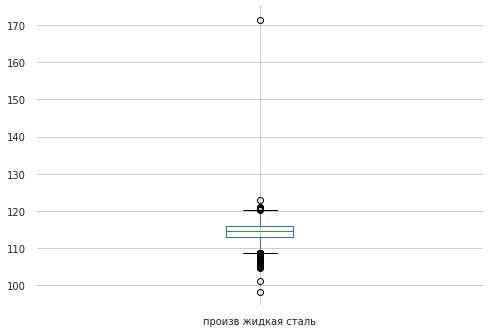

Данные по колонке: произв количество обработок
Заполненны на 91.52%


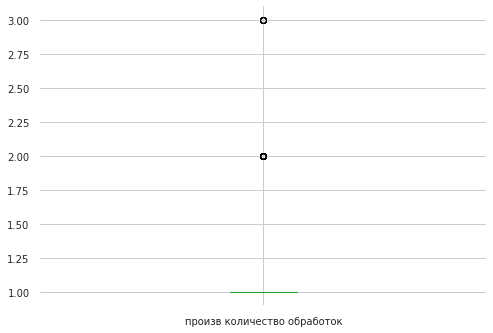

Данные по колонке: произв  количество плавок
Заполненны на 91.52%


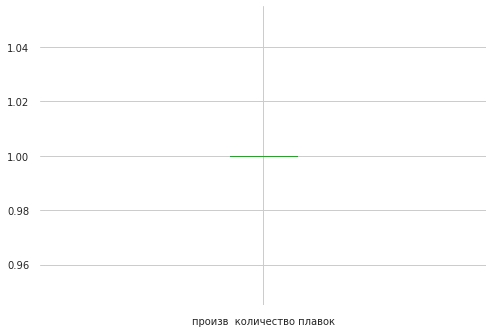

Данные по колонке: произв количество плавок (цел)
Заполненны на 91.52%


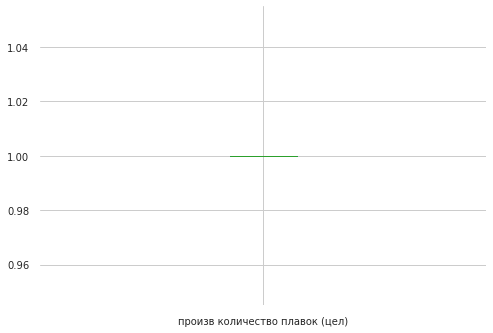

Данные по колонке: расход газ Ar
Заполненны на 91.27%


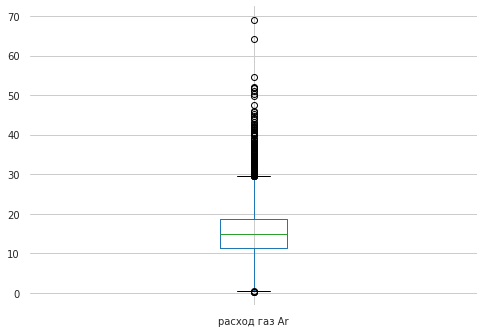

Данные по колонке: расход газ  N2
Заполненны на 19.73%


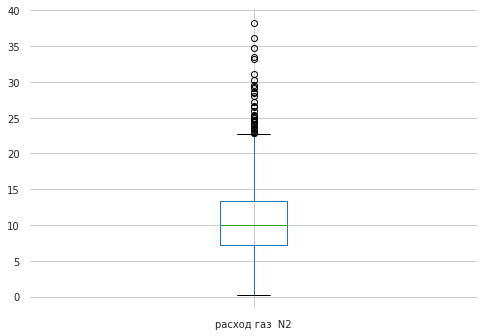

Данные по колонке: расход C пров.
Заполненны на 10.28%


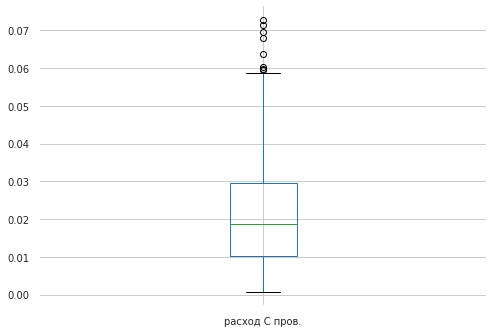

Данные по колонке: сыпуч известь РП
Заполненны на 67.75%


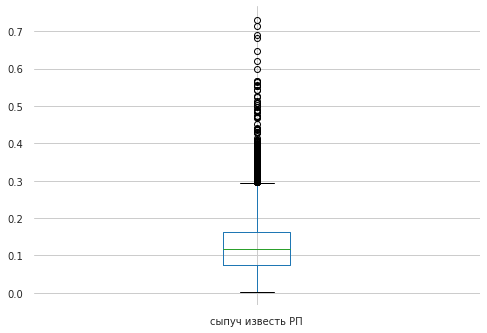

Данные по колонке: сыпуч кварцит
Заполненны на 0.18%


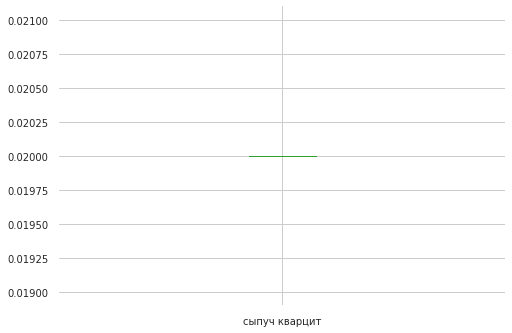

Данные по колонке: сыпуч кокс пыль УСТК
Заполненны на 91.21%


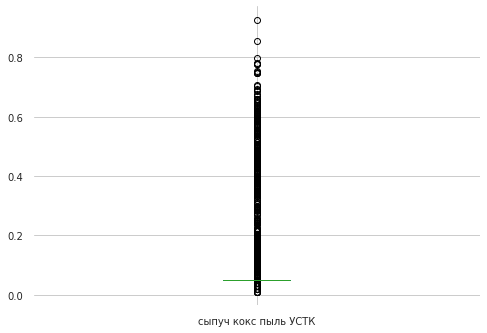

Данные по колонке: сыпуч  кокс. мелочь (сух.)
Заполненны на 0.1%


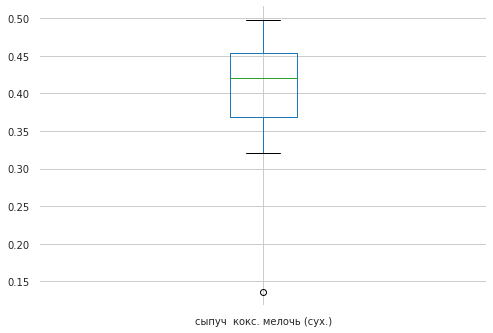

Данные по колонке: сыпуч  кокс. мелочь КМ1
Заполненны на 89.58%


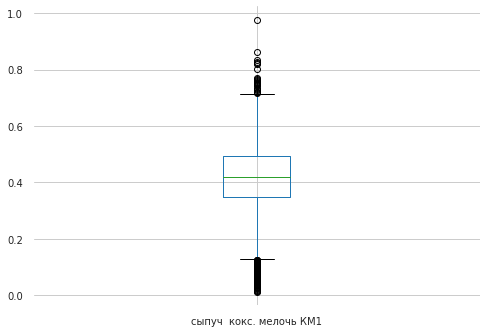

Данные по колонке: сыпуч  шпат плав.
Заполненны на 83.94%


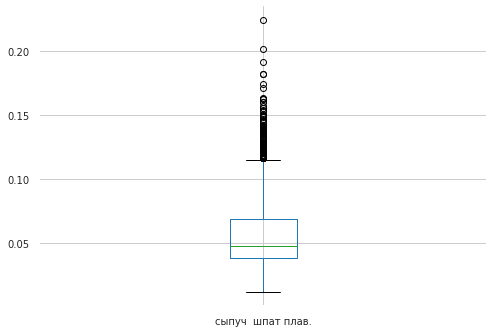

Данные по колонке: ферспл CaC2
Заполненны на 88.68%


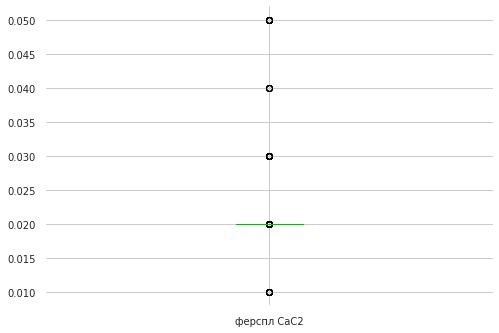

Данные по колонке: ферспл FeMo
Заполненны на 0.47%


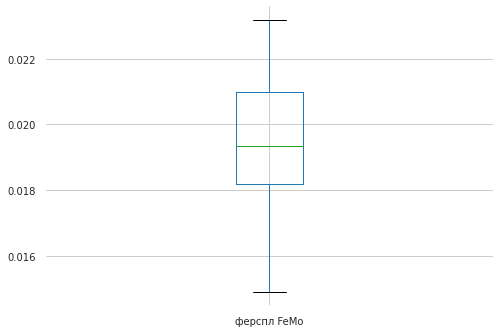

Данные по колонке: ферспл FeSi-75
Заполненны на 0.07%


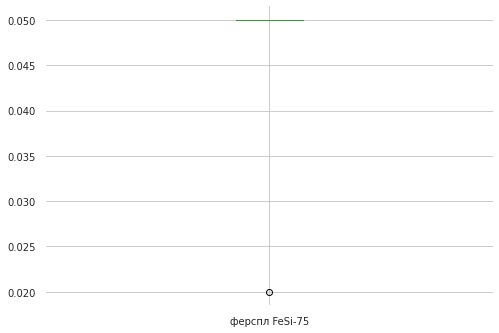

Данные по колонке: ферспл FeV азот.
Заполненны на 5.44%


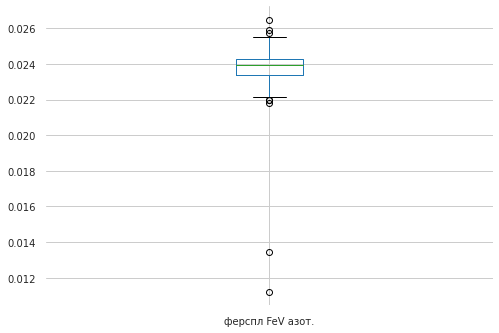

Данные по колонке: ферспл  FeV-80
Заполненны на 87.76%


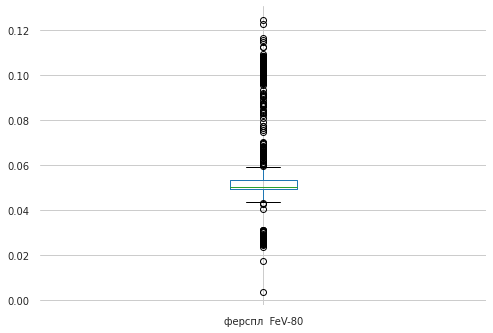

Данные по колонке: ферспл  Mn5Si65Al0.5
Заполненны на 90.9%


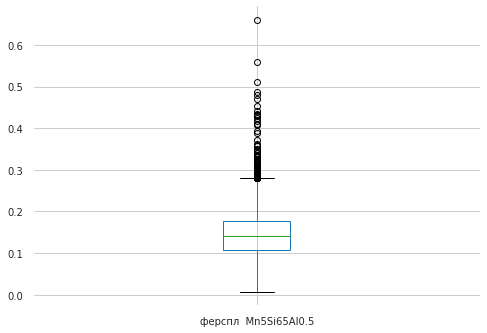

Данные по колонке: ферспл  Ni H1 пласт.
Заполненны на 1.16%


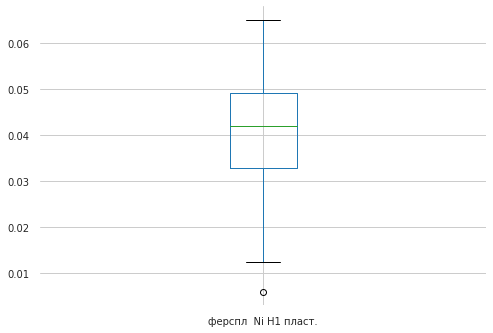

Данные по колонке: ферспл SiMn18
Заполненны на 90.87%


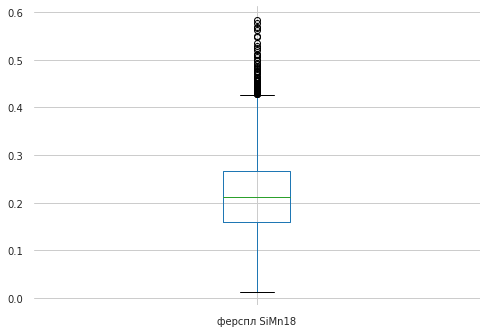

Данные по колонке: ферспл  ферванит
Заполненны на 14.44%


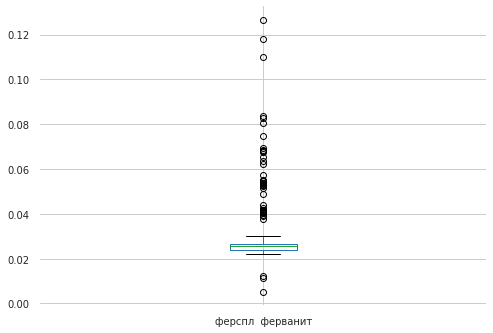

Данные по колонке: ферспл  фх850А
Заполненны на 83.55%


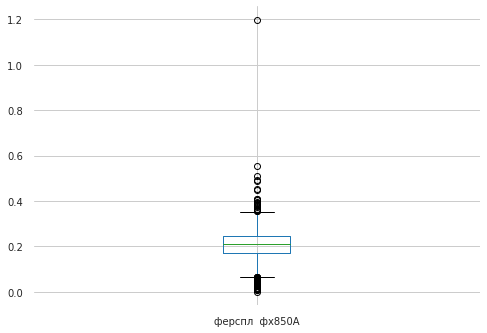

Данные по колонке: эл. энергия
Заполненны на 91.46%


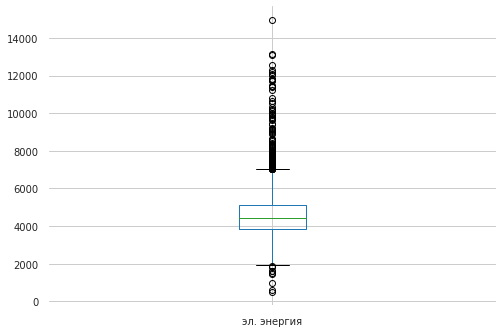

Данные по колонке: химсталь первый Al_1
Заполненны на 91.52%


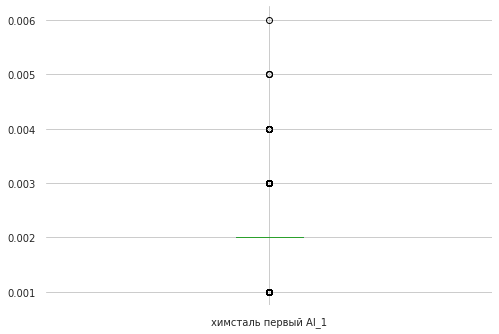

Данные по колонке: химсталь первый C_1
Заполненны на 91.52%


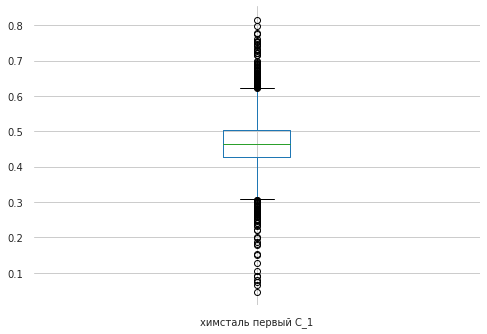

Данные по колонке: химсталь первый Cr_1
Заполненны на 91.52%


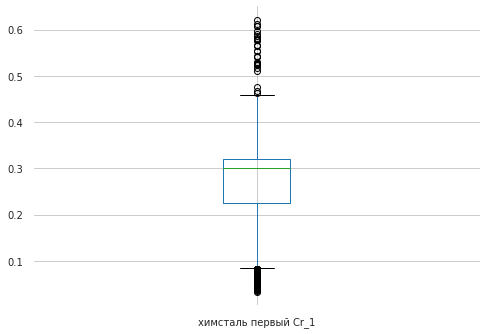

Данные по колонке: химсталь первый Cu_1
Заполненны на 91.52%


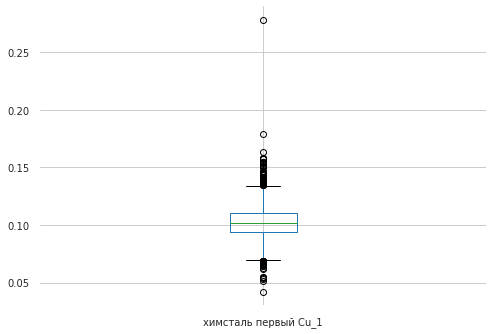

Данные по колонке: химсталь первый Mn_1
Заполненны на 91.52%


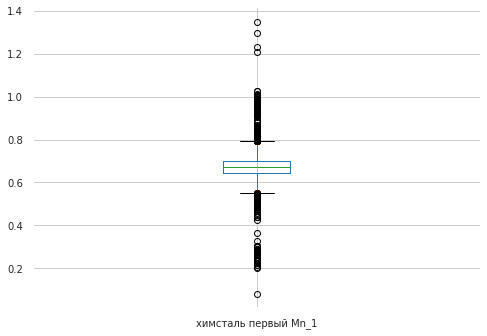

Данные по колонке: химсталь первый Mo_1
Заполненны на 91.51%


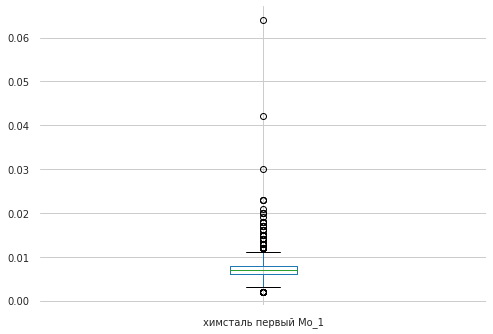

Данные по колонке: химсталь первый N_1
Заполненны на 91.51%


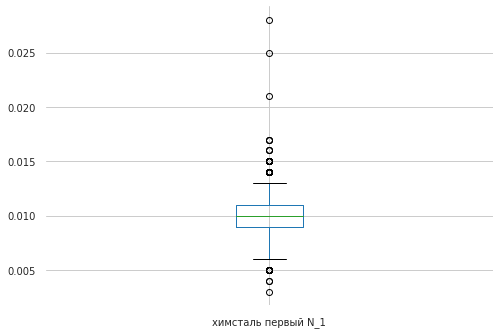

Данные по колонке: химсталь первый Ni_1
Заполненны на 91.52%


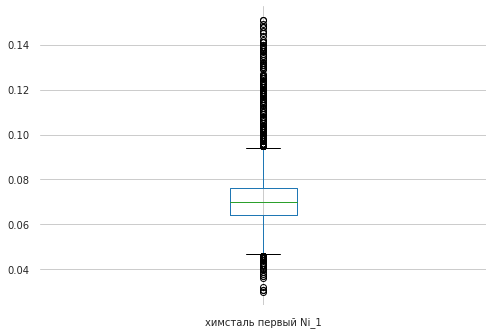

Данные по колонке: химсталь первый P_1
Заполненны на 91.52%


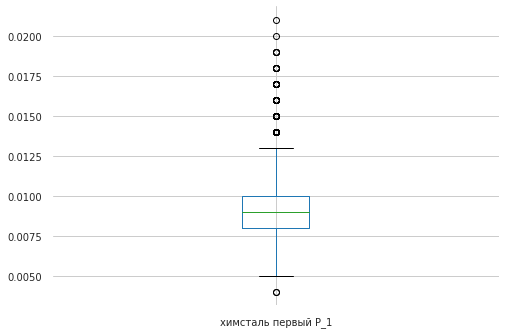

Данные по колонке: химсталь первый S_1
Заполненны на 91.52%


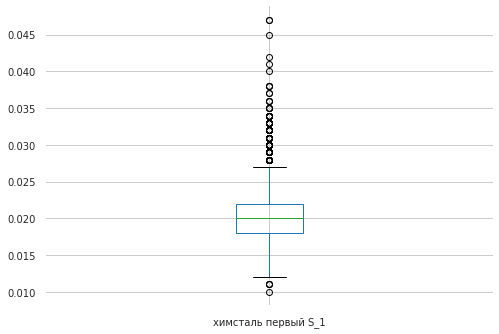

Данные по колонке: химсталь первый Si_1
Заполненны на 91.52%


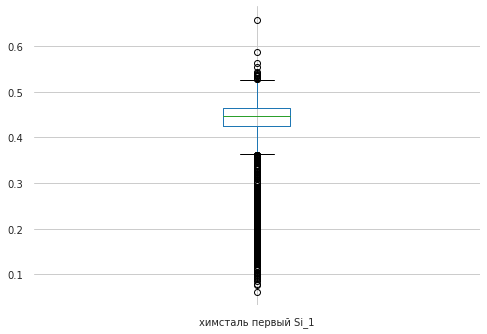

Данные по колонке: химсталь первый Ti_1
Заполненны на 91.52%


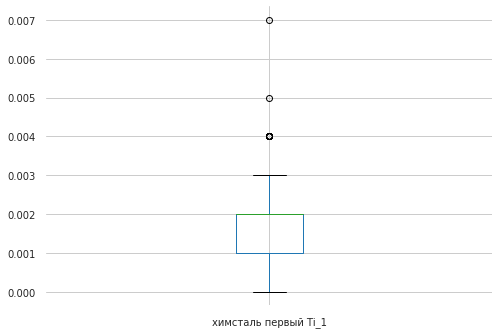

Данные по колонке: химсталь первый V_1
Заполненны на 91.52%


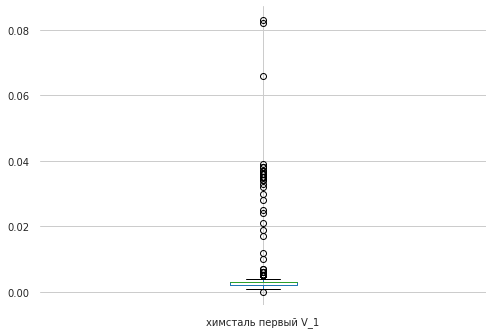

Данные по колонке: химсталь последний Al
Заполненны на 91.52%


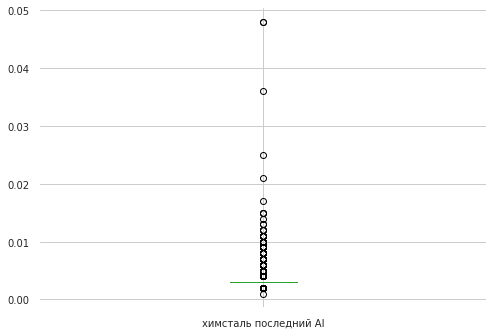

Данные по колонке: химсталь последний C
Заполненны на 91.52%


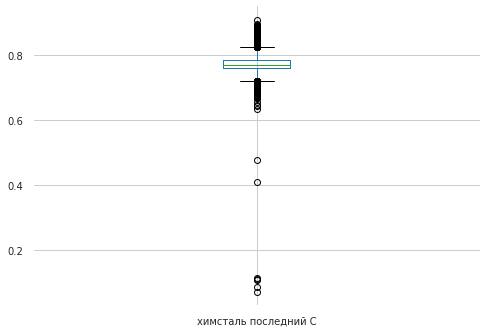

Данные по колонке: химсталь последний Ca
Заполненны на 88.31%


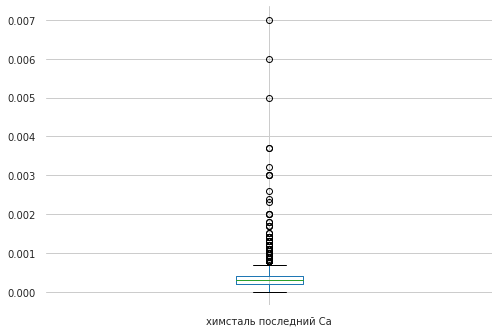

Данные по колонке: химсталь последний Cr
Заполненны на 91.52%


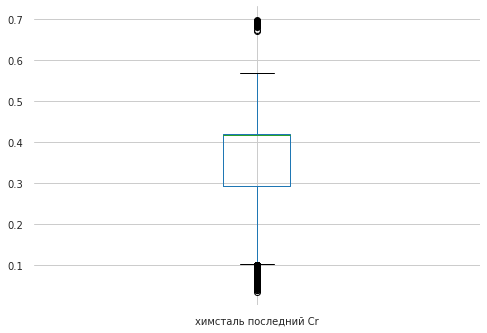

Данные по колонке: химсталь последний Cu
Заполненны на 91.52%


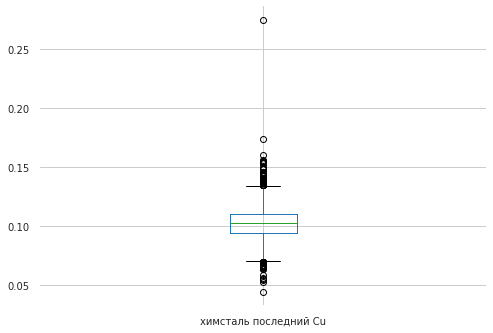

Данные по колонке: химсталь последний Mn
Заполненны на 91.52%


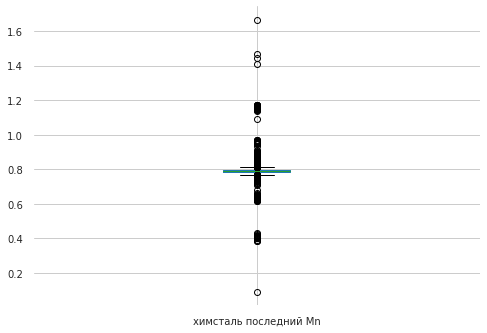

Данные по колонке: химсталь последний Mo
Заполненны на 91.52%


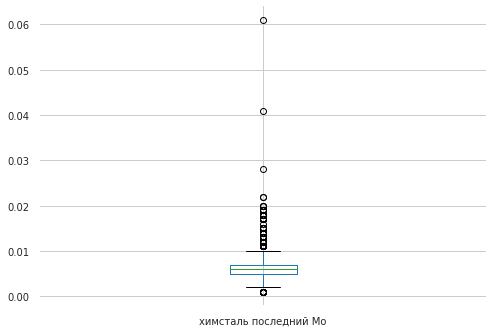

Данные по колонке: химсталь последний N
Заполненны на 91.49%


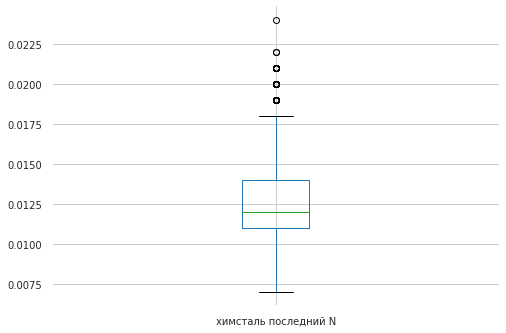

Данные по колонке: химсталь последний Ni
Заполненны на 91.52%


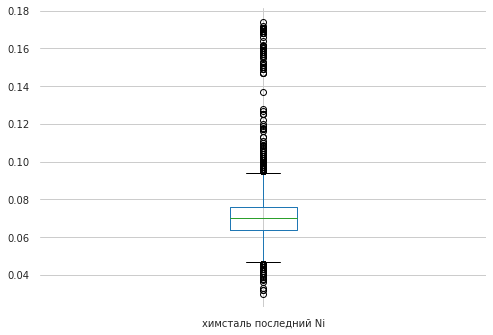

Данные по колонке: химсталь последний P
Заполненны на 91.52%


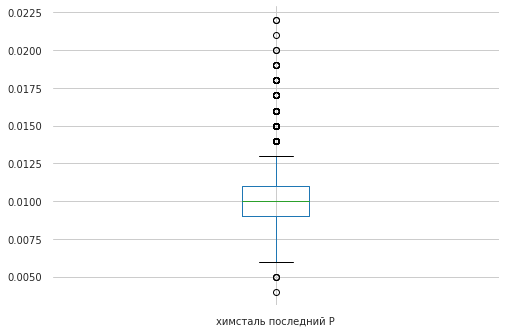

Данные по колонке: химсталь последний S
Заполненны на 91.52%


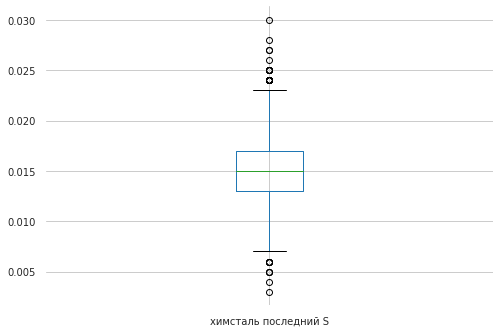

Данные по колонке: химсталь последний Si
Заполненны на 91.52%


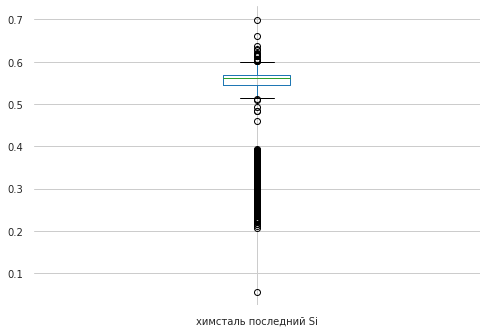

Данные по колонке: химсталь последний Ti
Заполненны на 91.52%


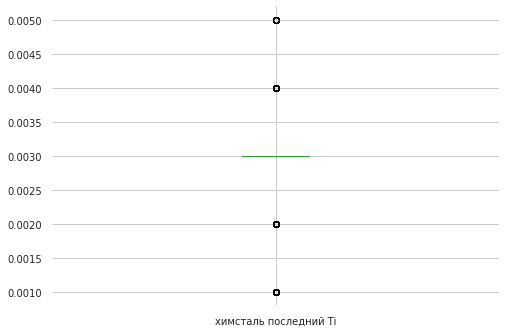

Данные по колонке: химсталь последний V
Заполненны на 91.52%


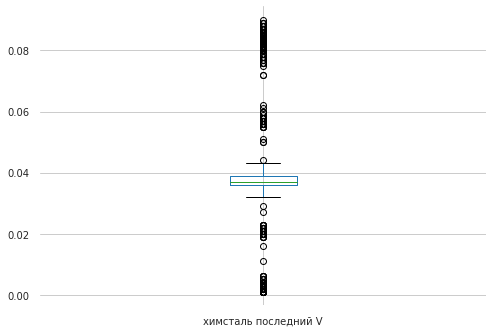

Данные по колонке: химшлак первый Al2O3_1
Заполненны на 67.35%


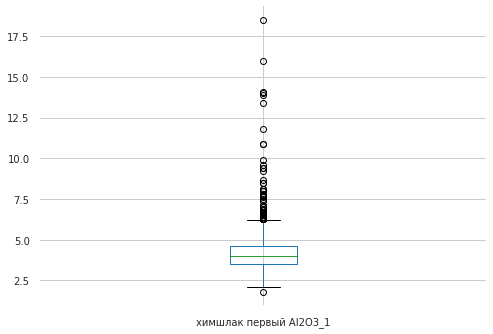

Данные по колонке: химшлак первый CaO_1
Заполненны на 91.52%


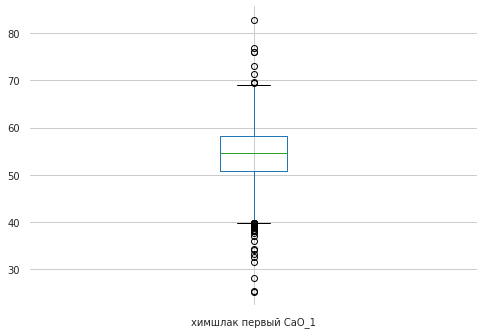

Данные по колонке: химшлак первый FeO_1
Заполненны на 91.52%


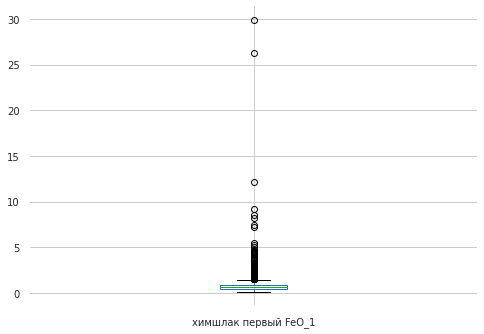

Данные по колонке: химшлак первый MgO_1
Заполненны на 91.51%


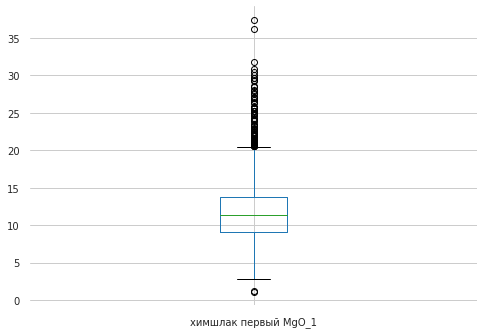

Данные по колонке: химшлак первый MnO_1
Заполненны на 91.52%


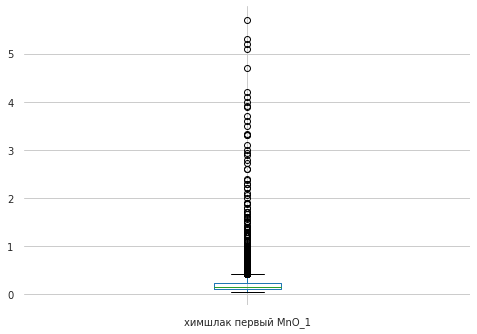

Данные по колонке: химшлак первый R_1
Заполненны на 91.52%


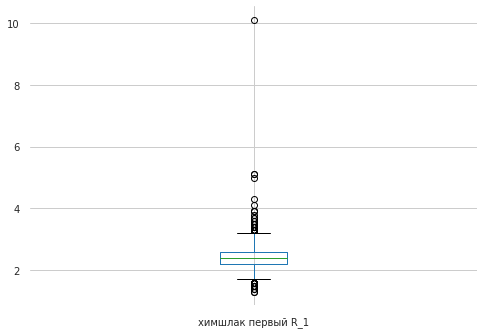

Данные по колонке: химшлак первый SiO2_1
Заполненны на 67.35%


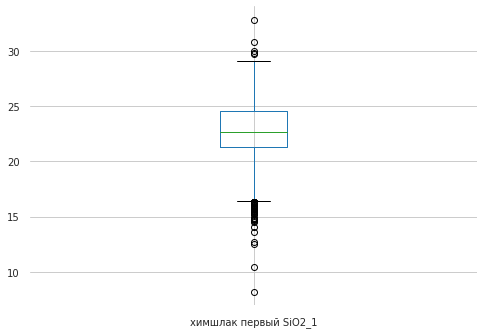

Данные по колонке: химшлак последний FeO
Заполненны на 91.52%


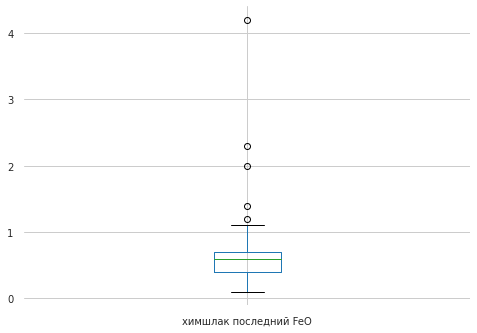

Данные по колонке: химшлак последний MgO
Заполненны на 91.51%


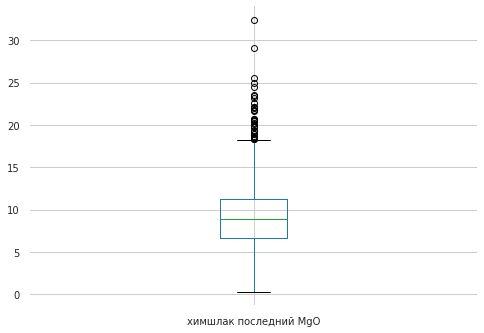

Данные по колонке: химшлак последний MnO
Заполненны на 91.52%


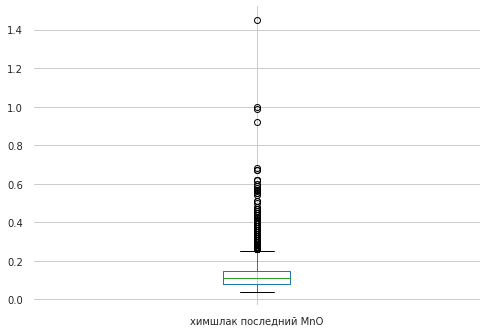


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Обзор выбросов в колонок:
['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

Данные по колонке: химшлак последний Al2O3
Заполненны на 67.35%


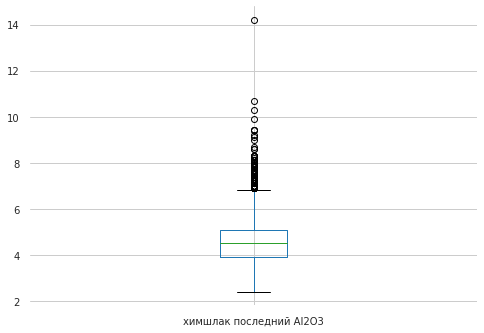

Данные по колонке: химшлак последний CaO
Заполненны на 91.52%


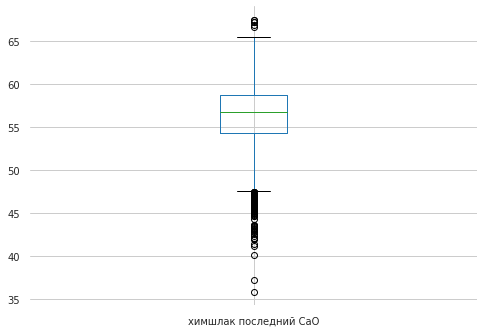

Данные по колонке: химшлак последний R
Заполненны на 91.52%


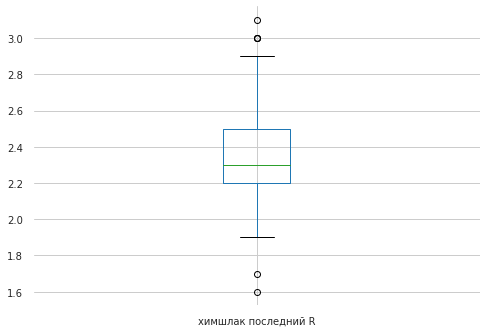

Данные по колонке: химшлак последний SiO2
Заполненны на 67.35%


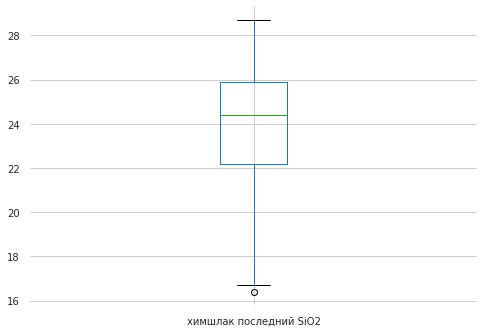

In [15]:
for col_list in X_columns, y_columns:
    print(f"\n{'+'*100}\nОбзор выбросов в колонок:\n{col_list}\n{'+'*100}\n")
    for column in col_list:
        if column in ('МАРКА', 'DT', 'ПРОФИЛЬ'):
          continue
        plt.figure()
        is_nan = df_in[column].isna().value_counts()
        plt_zap = round(is_nan[False] / df_in.shape[0] * 100, 2)
        print(f"Данные по колонке: {column}\nЗаполненны на {plt_zap}%")
        df_in[column].plot.box(grid = True)
        plt.show()

Выбросы не чистил

## Подготовка данных

In [16]:
from sklearn.preprocessing import MinMaxScaler, normalize, StandardScaler
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.multioutput import MultiOutputRegressor

In [17]:
def cat_to_num(df):
  # df['nplv'] = df['nplv'].apply(lambda x: ''.join([c for c in x.replace('?', '0') if c.isdigit()])).astype('int64')
  # df['nplv'] = normalize(df[['nplv']])
  df.drop('nplv', axis=1, inplace=True)
  columns_float = df.drop(['DT', 'МАРКА', 'ПРОФИЛЬ'], axis=1).columns.values
  df.loc[:, columns_float] =  df.loc[:, columns_float].replace(',', '.', regex=True).astype('float64')
  return df

In [18]:
def one_hot(data, dum_col):
    dum = pd.get_dummies(data.loc[:, dum_col])
    data = pd.concat([data, dum], axis=1, join="inner")
    data.drop(labels=dum_col, axis=1, inplace=True)
    return data

dum_col = ['произв количество обработок',
           'произв  количество плавок',
           'произв количество плавок (цел)',
           'сыпуч кварцит',
           'сыпуч  кокс. мелочь (сух.)',
           'ферспл CaC2',
           'ферспл FeSi-75',
           'химсталь первый Al_1',
           'химсталь первый Ti_1',
           'химсталь последний Ti',
           'ПРОФИЛЬ']

In [19]:
# dum_col = []
# for col in df.drop(['DT', 'МАРКА'], axis=1).columns.values:
#   if len(df[col].unique()) < 10:
#     dum_col.append(col)
# dum_col.append('ПРОФИЛЬ')
# dum_col

In [20]:
# [col for col in df.columns if df[col].dtype == 'O']

In [21]:
def data_preprocessing(df):
    df = cat_to_num(df[df.МАРКА == 'Э76ХФ']).fillna(0)
    df = one_hot(df, dum_col)
    df.drop(labels=['DT', 'МАРКА'], axis=1, inplace=True)
    return df

y_columns = ['химшлак последний Al2O3', 'химшлак последний CaO', 'химшлак последний R', 'химшлак последний SiO2']

In [22]:
pd.options.mode.chained_assignment = None  # default='warn'     
# не нашёл из-за чего варнинг

df = pd.read_csv('/content/Decoder_hack_EVRAZ/data/input/Исходные данные.csv', 
            encoding = 'utf-8', 
            index_col = 0,
            sep = ';')
df = data_preprocessing(df)
df

,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,чист расход Si,чист расход V,температура первая,температура последняя,Ar (интенс.),N2 (интенс.),эл. энергия (интенс.),произв жидкая сталь,расход газ Ar,расход газ N2,расход C пров.,сыпуч известь РП,сыпуч кокс пыль УСТК,сыпуч кокс. мелочь КМ1,сыпуч шпат плав.,ферспл FeMo,ферспл FeV азот.,ферспл FeV-80,ферспл Mn5Si65Al0.5,ферспл Ni H1 пласт.,ферспл SiMn18,ферспл ферванит,ферспл фх850А,эл. энергия,химсталь первый C_1,химсталь первый Cr_1,химсталь первый Cu_1,химсталь первый Mn_1,химсталь первый Mo_1,химсталь первый N_1,химсталь первый Ni_1,химсталь первый P_1,химсталь первый S_1,химсталь первый Si_1,химсталь первый V_1,химсталь последний Al,химсталь последний C,химсталь последний Ca,химсталь последний Cr,химсталь последний Cu,химсталь последний Mn,химсталь последний Mo,химсталь последний N,химсталь последний Ni,химсталь последний P,химсталь последний S,химсталь последний Si,химсталь последний V,химшлак первый Al2O3_1,химшлак первый CaO_1,химшлак первый FeO_1,химшлак первый MgO_1,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2,ПРОФИЛЬ_Р65,ПРОФИЛЬ_Шар заг d шара 100 мм 2 гр.
0,29.0,45.366667,24.400000,41.033333,0.000000,0.456460,0.059572,0.117446,0.104762,0.040938,1557.0,1580.0,13.606742,0,12809.016393,115.5,18.611,0,0.0,0.000,0.170,0.401,0.123,0,0,0.051939,0.112,0,0.182,0,0.106,5209.0,0.389,0.368,0.127,0.682,0.010,0.011,0.086,0.009,0.023,0.459,0.002,0.003,0.756,0.0001,0.417,0.126,0.779,0.009,0.012,0.086,0.011,0.018,0.559,0.037,0.0,63.7,1.1,3.7,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0,1,0
1,26.0,44.066667,13.866667,44.066667,0.000000,0.359285,0.083738,0.160923,0.110327,0.040083,1601.0,1591.0,8.074721,0,12816.346154,111.6,11.659,0,0.0,0.000,0.488,0.000,0.094,0,0,0.050854,0.102,0,0.251,0,0.149,2962.0,0.465,0.345,0.112,0.643,0.009,0.011,0.080,0.007,0.023,0.461,0.002,0.003,0.774,0.0003,0.416,0.109,0.767,0.008,0.013,0.079,0.008,0.021,0.543,0.038,0.0,58.5,0.8,4.9,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0,1,0
2,24.0,43.350000,17.950000,43.350000,0.000000,0.331665,0.081490,0.132332,0.139860,0.041622,1593.0,1586.0,13.801968,0,12511.420613,115.8,19.871,0,0.0,0.000,0.050,0.346,0.061,0,0,0.052807,0.160,0,0.204,0,0.145,3743.0,0.513,0.351,0.107,0.674,0.007,0.011,0.078,0.008,0.019,0.455,0.002,0.004,0.770,0.0009,0.417,0.108,0.788,0.006,0.012,0.078,0.008,0.013,0.568,0.038,0.0,58.0,0.8,8.6,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0,1,0
3,17.0,46.183333,19.816667,46.183333,0.000000,0.377945,0.133194,0.221605,0.165186,0.042050,1589.0,1589.0,12.664958,0,12998.149706,116.3,19.497,0,0.0,0.077,0.050,0.390,0.059,0,0,0.053349,0.161,0,0.345,0,0.237,4293.0,0.487,0.310,0.105,0.611,0.009,0.011,0.070,0.006,0.020,0.434,0.001,0.003,0.767,0.0002,0.419,0.103,0.795,0.008,0.013,0.070,0.007,0.014,0.571,0.038,0.0,59.8,0.4,6.4,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0,1,0
4,20.0,48.500000,17.033333,48.500000,0.000000,0.389875,0.105094,0.169459,0.143024,0.040967,1597.0,1592.0,10.298350,0,12987.475538,115.0,16.649,0,0.0,0.082,0.050,0.412,0.035,0,0,0.051975,0.149,0,0.263,0,0.187,3687.0,0.461,0.334,0.105,0.652,0.007,0.011,0.080,0.007,0.020,0.447,0.002,0.003,0.784,0.0003,0.421,0.105,0.796,0.006,0.013,0.081,0.008,0.017,0.568,0.037,0.0,59.6,0.7,4.7,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,33.0,42.200000,17.850000,42.200000,4.000000,0.471755,0.137332,0.139956,0.176122,0.041047,1586.0,1581.0,13.672038,0,13472.268908,115.4,19.232,0,0.0,0.199,0.050,0.508,0.039,0,0,0.051360,0.214,0,0.214,0,0.247,4008.0,0.405,0.300,0.112

In [23]:
# # долго считает
# profile = pandas_profiling.ProfileReport(df, title='After data_preprocessing')
# # profile.to_notebook_iframe()
# profile.to_file("/content/profile_data_preprocessed.html")

In [24]:
X = df.drop(y_columns, axis=1)
y = df[y_columns]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.15, random_state=13, shuffle=True)

## Predict

In [26]:
scaler = MinMaxScaler()
names = X_train.columns
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train = pd.DataFrame(scaled_X_train, columns=names)

standart_scaler = StandardScaler()
names = X_train.columns
standart_X_train = standart_scaler.fit_transform(X_train)
standart_X_train = pd.DataFrame(standart_X_train, columns=names)

normalized_X_train = pd.DataFrame(normalize(X_train, axis=0), columns=names)

In [27]:
# Проврерка Explained_variance_score
def evs(reg):
  pred = reg.predict(np.array(X_test))
  print(f"Explained_variance_score: {round(explained_variance_score(y_test, pred) * 100, 2)}%")
  

In [28]:
# Линейная регрессия
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
evs(reg)

reg = LinearRegression()
cv_score = cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(X_train, y_train).predict(X_test), y_test)

Explained_variance_score: 96.48%
[-3.21549988 -3.8008766  -2.83965686 -2.91028227 -3.11985972] 
mean cv score: -3.1772350650209273


3.054333418334075

In [29]:
# надо по подбирать под разные таргеты разные алгоритмы, вдруг прокатит
# ещё можно попробовать предсказывать какую-нибудь колонку, на которой ошибка маленькая,
# и стакать её с другими признаками, потом делать по этому предикт
reg = LinearRegression()
for col in y_train.columns.values:
  print(mean_squared_error(reg.fit(X_train, y_train[col]).predict(X_test), y_test[col]))

0.2986912836830645
9.096023576056266
0.021535860105563416
2.8010829534980215


In [30]:
reg = LinearRegression()
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-3.21549988 -3.8008766  -2.83965686 -2.91028227 -3.11985972] 
mean cv score: -3.177235065019903


3.0543334183327255

In [31]:
reg = LinearRegression()
cv_score = cross_val_score(reg, scaled_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(scaled_X_train, y_train).predict(X_test), y_test)

[-3.21549988 -3.8008766  -2.83965686 -2.91028227 -3.11985972] 
mean cv score: -3.1772350650199046


43453857.96168085

In [32]:
reg = LinearRegression()
cv_score = cross_val_score(reg, normalized_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(normalized_X_train, y_train).predict(normalize(X_test, axis=0)), y_test)

[-3.21549988 -3.8008766  -2.83965686 -2.91028227 -3.11985972] 
mean cv score: -3.1772350650199046


1559.7209587261268

In [33]:
reg = LinearRegression(normalize=True)
cv_score = cross_val_score(reg, X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(X_train, y_train).predict(X_test), y_test)

[-3.21671962 -3.79602867 -2.83965686 -2.89405109 -3.13484906] 
mean cv score: -3.17626105770789


3.0542963469572078

In [34]:
from sklearn.linear_model import ElasticNet, MultiTaskElasticNetCV
reg = ElasticNet(random_state=0)
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-7.1806023  -7.72331711 -6.80065773 -6.72281734 -7.34577797] 
mean cv score: -7.154634487743823


6.922520431425891

In [35]:
reg = MultiTaskElasticNetCV(cv=5, random_state=0)
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1790: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 2025.313158625424, tolerance: 189.59723049049884



3.1776706670144863

In [36]:
# Ridge
from sklearn.linear_model import Ridge

reg = MultiOutputRegressor(Ridge(random_state=42))
cv_score = cross_val_score(reg, standart_X_train, y_train, cv = 5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-3.21588949 -3.78138766 -2.83121148 -2.90085963 -3.12760382] 
mean cv score: -3.1713904151241348


3.041233373160092

In [37]:
import xgboost as xgb

xgbr = MultiOutputRegressor(xgb.XGBRegressor(verbosity=0)).fit(X_train, y_train)
cross_val_score(xgbr, X_train, y_train, cv=10, scoring='neg_mean_squared_error').mean()

-3.350929918422999

In [38]:
# хорошо бы использовать встроенную в catboost обработку категориальных
from catboost import CatBoostRegressor
# cbr = MultiOutputRegressor(CatBoostRegressor(allow_writing_files=False, verbose=False, random_seed=42, objective='MAPE')).fit(X_train, y_train)
cbr = MultiOutputRegressor(CatBoostRegressor(verbose=False, random_seed=42))
cv_score = cross_val_score(cbr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(cv_score, '\nmean cv score:', cv_score.mean())
mean_squared_error(reg.fit(standart_X_train, y_train).predict(standart_scaler.transform(X_test)), y_test)

[-3.01911237 -3.62945027 -2.51229087 -2.6276145  -2.90712305] 
mean cv score: -2.939118212495712


3.041233373160092